# EDA (Varun's)
The goal of this notebook is to investigate the data. We can answer the following questions

0. Load data and imports
1. Define key metrics
2. perform eda
3. what data is available
4. visualize the data

# 0. Load data and imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
os.chdir('/Users/varunvenkatesh/Documents/Github/ev_charging/')

In [3]:
# get dataframes by reading all parquet files in a directory
# https://stackoverflow.com/a/66104513
df_ct = pd.read_parquet('data/sessions/caltech/')
df_jpl = pd.read_parquet('data/sessions/jpl/')
df_of = pd.read_parquet('data/sessions/office001/')
print(f"Caltech Shape: {df_ct.shape}\nJPL Shape: {df_jpl.shape}\nOffice Shape: {df_of.shape}")

Caltech Shape: (31125, 12)
JPL Shape: (33587, 12)
Office Shape: (1681, 12)


In [4]:
df_ct.reset_index(drop=True, inplace=True)
df_ct.head()

,_id,userInputs,sessionID,stationID,spaceID,siteID,clusterID,connectionTime,disconnectTime,kWhDelivered,doneChargingTime,userID
0,5bc9160af9af8b0dad3c0690,None,2_39_95_27_2018-05-01 13:23:18.374684,2-39-95-27,CA-319,2,39,2018-05-01 06:23:18-07:00,2018-05-01 18:53:41-07:00,13.410,2018-05-01 10:17:07-07:00,None
1,5bc9160af9af8b0dad3c0691,None,2_39_79_380_2018-05-01 13:54:33.599590,2-39-79-380,CA-489,2,39,2018-05-01 06:54:34-07:00,2018-05-01 16:15:35-07:00,8.618,2018-05-01 08:35:39-07:00,None
2,5bc9160af9af8b0dad3c0692,None,2_39_139_28_2018-05-01 14:46:04.441389,2-39-139-28,CA-303,2,39,2018-05-01 07:46:04-07:00,2018-05-01 17:54:07-07:00,13.969,2018-05-01 16:57:02-07:00,None
3,5bc9160af9af8b0dad3c0693,None,2_39_79_378_2018-05-01 14:56:28.908623,2-39-79-378,CA-326,2,39,2018-05-01 07:56:29-07:00,2018-05-01 14:52:45-07:00,6.914,2018-05-01 09:07:56-07:00,None
4,5bc9160af9af8b0dad3c0694,None,2_39_88_24_2018-05-01 15:14:50.443137,2-39-88-24,CA-314,2,39,2018-05-01 08:14:50-07:00,2018-05-01 15:51:30-07:00,13.785,2018-05-01 13:18:12-07:00,None


In [5]:
df_jpl.reset_index(drop=True, inplace=True)
df_jpl.head()

,_id,userInputs,sessionID,stationID,spaceID,siteID,clusterID,connectionTime,disconnectTime,kWhDelivered,doneChargingTime,userID
0,5c36621bf9af8b4639a8e0b4,None,1_1_179_800_2018-09-05 11:04:12.876087,1-1-179-800,AG-3F32,1,1,2018-09-05 04:04:13-07:00,2018-09-05 12:09:35-07:00,9.583,None,None
1,5c36621bf9af8b4639a8e0b5,"[{'userID': 333, 'milesRequested': 20, 'WhPerM...",1_1_179_794_2018-09-05 11:08:08.945820,1-1-179-794,AG-3F20,1,1,2018-09-05 04:08:09-07:00,2018-09-05 07:09:02-07:00,7.114,None,000000333
2,5c36621bf9af8b4639a8e0b6,"[{'userID': 371, 'milesRequested': 20, 'WhPerM...",1_1_179_797_2018-09-05 12:35:14.070250,1-1-179-797,AG-3F23,1,1,2018-09-05 05:35:14-07:00,2018-09-05 17:30:12-07:00,11.774,None,000000371
3,5c36621bf9af8b4639a8e0b7,"[{'userID': 405, 'milesRequested': 20, 'WhPerM...",1_1_179_781_2018-09-05 12:51:31.050539,1-1-179-781,AG-3F31,1,1,2018-09-05 05:51:31-07:00,2018-09-05 15:32:58-07:00,6.280,None,000000405
4,5c36621bf9af8b4639a8e0b8,"[{'userID': 368, 'milesRequested': 20, 'WhPerM...",1_1_179_787_2018-09-05 13:08:27.901538,1-1-179-787,AG-3F16,1,1,2018-09-05 06:08:28-07:00,2018-09-05 16:32:52-07:00,7.022,None,000000368


In [6]:
df_of.reset_index(drop=True, inplace=True)
df_of.head()

,_id,userInputs,userID,sessionID,stationID,spaceID,siteID,clusterID,connectionTime,disconnectTime,kWhDelivered,doneChargingTime
0,5cd1d47af9af8b68f0e96713,None,None,19_102_260_1633_2019-03-25 16:24:42.408146,19-102-260-1633,02,19,102,2019-03-25 09:24:42-07:00,2019-03-25 18:32:12-07:00,6.146,2019-03-25 10:32:48-07:00
1,5cd1d47af9af8b68f0e96714,None,None,19_102_260_1634_2019-03-25 17:19:26.896309,19-102-260-1634,03,19,102,2019-03-25 10:19:27-07:00,2019-03-25 17:38:50-07:00,3.658,2019-03-25 11:00:49-07:00
2,5cd1d47af9af8b68f0e96715,None,None,19_102_260_1640_2019-03-25 21:27:32.338192,19-102-260-1640,08,19,102,2019-03-25 14:27:32-07:00,2019-03-25 20:32:03-07:00,28.330,2019-03-25 19:10:40-07:00
3,5cd1d47df9af8b68f0e96716,None,None,19_102_260_1640_2019-03-26 18:33:56.204855,19-102-260-1640,08,19,102,2019-03-26 11:33:56-07:00,2019-03-26 17:45:33-07:00,12.978,2019-03-26 15:30:58-07:00
4,5cd1d47ef9af8b68f0e96717,None,None,19_102_260_1640_2019-03-27 18:28:00.642220,19-102-260-1640,08,19,102,2019-03-27 11:28:01-07:00,2019-03-27 17:37:47-07:00,10.688,2019-03-27 14:44:03-07:00


In [60]:
print(f"site ID for caltech: {df_ct['siteID'].unique()}")
print(f"site ID for jpl: {df_jpl['siteID'].unique()}")
print(f"site ID for office: {df_of['siteID'].unique()}")

site ID for caltech: [2]
site ID for jpl: [1]
site ID for office: [19]


# Convert times
Something is off about the time zone, so I made it utc to stop throwing errors. not my best idea but it works for now

In [7]:
def datetime_processing(df):
    df['connectionTime'] = pd.to_datetime(df['connectionTime'], infer_datetime_format=True, utc=True, errors='coerce')
    df['connectionTimeHour'] = df['connectionTime'].dt.hour
    df['connectionTimeDay'] = df['connectionTime'].dt.day
    df['disconnectTime'] = pd.to_datetime(df['disconnectTime'], infer_datetime_format=True, utc=True, errors='coerce')
    df['disconnectTimeHour'] = df['disconnectTime'].dt.hour
    df['disconnectTimeDay'] = df['disconnectTime'].dt.day
    df['doneChargingTime'] = pd.to_datetime(df['doneChargingTime'], infer_datetime_format=True, utc=True, errors='coerce')
    df['doneChargingTimeHour'] = df['doneChargingTime'].dt.hour
    df['doneChargingTimeDay'] = df['doneChargingTime'].dt.day
    return df

In [8]:
df_ct = datetime_processing(df_ct)
df_jpl = datetime_processing(df_jpl)
df_of = datetime_processing(df_of)

In [63]:
df_ct.head()

,_id,userInputs,sessionID,stationID,spaceID,siteID,clusterID,connectionTime,disconnectTime,kWhDelivered,doneChargingTime,userID,connectionTimeHour,connectionTimeDay,disconnectTimeHour,disconnectTimeDay,doneChargingTimeHour,doneChargingTimeDay
0,5bc9160af9af8b0dad3c0690,None,2_39_95_27_2018-05-01 13:23:18.374684,2-39-95-27,CA-319,2,39,2018-05-01 13:23:18+00:00,2018-05-02 01:53:41+00:00,13.410,2018-05-01 17:17:07+00:00,None,13,1,1,2,17.0,1.0
1,5bc9160af9af8b0dad3c0691,None,2_39_79_380_2018-05-01 13:54:33.599590,2-39-79-380,CA-489,2,39,2018-05-01 13:54:34+00:00,2018-05-01 23:15:35+00:00,8.618,2018-05-01 15:35:39+00:00,None,13,1,23,1,15.0,1.0
2,5bc9160af9af8b0dad3c0692,None,2_39_139_28_2018-05-01 14:46:04.441389,2-39-139-28,CA-303,2,39,2018-05-01 14:46:04+00:00,2018-05-02 00:54:07+00:00,13.969,2018-05-01 23:57:02+00:00,None,14,1,0,2,23.0,1.0
3,5bc9160af9af8b0dad3c0693,None,2_39_79_378_2018-05-01 14:56:28.908623,2-39-79-378,CA-326,2,39,2018-05-01 14:56:29+00:00,2018-05-01 21:52:45+00:00,6.914,2018-05-01 16:07:56+00:00,None,14,1,21,1,16.0,1.0
4,5bc9160af9af8b0dad3c0694,None,2_39_88_24_2018-05-01 15:14:50.443137,2-39-88-24,CA-314,2,39,2018-05-01 15:14:50+00:00,2018-05-01 22:51:30+00:00,13.785,2018-05-01 20:18:12+00:00,None,15,1,22,1,20.0,1.0


In [64]:
df_jpl.head()

,_id,userInputs,sessionID,stationID,spaceID,siteID,clusterID,connectionTime,disconnectTime,kWhDelivered,doneChargingTime,userID,connectionTimeHour,connectionTimeDay,disconnectTimeHour,disconnectTimeDay,doneChargingTimeHour,doneChargingTimeDay
0,5c36621bf9af8b4639a8e0b4,None,1_1_179_800_2018-09-05 11:04:12.876087,1-1-179-800,AG-3F32,1,1,2018-09-05 11:04:13+00:00,2018-09-05 19:09:35+00:00,9.583,NaT,None,11,5,19,5,NaN,NaN
1,5c36621bf9af8b4639a8e0b5,"[{'userID': 333, 'milesRequested': 20, 'WhPerM...",1_1_179_794_2018-09-05 11:08:08.945820,1-1-179-794,AG-3F20,1,1,2018-09-05 11:08:09+00:00,2018-09-05 14:09:02+00:00,7.114,NaT,000000333,11,5,14,5,NaN,NaN
2,5c36621bf9af8b4639a8e0b6,"[{'userID': 371, 'milesRequested': 20, 'WhPerM...",1_1_179_797_2018-09-05 12:35:14.070250,1-1-179-797,AG-3F23,1,1,2018-09-05 12:35:14+00:00,2018-09-06 00:30:12+00:00,11.774,NaT,000000371,12,5,0,6,NaN,NaN
3,5c36621bf9af8b4639a8e0b7,"[{'userID': 405, 'milesRequested': 20, 'WhPerM...",1_1_179_781_2018-09-05 12:51:31.050539,1-1-179-781,AG-3F31,1,1,2018-09-05 12:51:31+00:00,2018-09-05 22:32:58+00:00,6.280,NaT,000000405,12,5,22,5,NaN,NaN
4,5c36621bf9af8b4639a8e0b8,"[{'userID': 368, 'milesRequested': 20, 'WhPerM...",1_1_179_787_2018-09-05 13:08:27.901538,1-1-179-787,AG-3F16,1,1,2018-09-05 13:08:28+00:00,2018-09-05 23:32:52+00:00,7.022,NaT,000000368,13,5,23,5,NaN,NaN


In [65]:
df_of.head()

,_id,userInputs,userID,sessionID,stationID,spaceID,siteID,clusterID,connectionTime,disconnectTime,kWhDelivered,doneChargingTime,connectionTimeHour,connectionTimeDay,disconnectTimeHour,disconnectTimeDay,doneChargingTimeHour,doneChargingTimeDay
0,5cd1d47af9af8b68f0e96713,None,None,19_102_260_1633_2019-03-25 16:24:42.408146,19-102-260-1633,02,19,102,2019-03-25 16:24:42+00:00,2019-03-26 01:32:12+00:00,6.146,2019-03-25 17:32:48+00:00,16,25,1,26,17.0,25.0
1,5cd1d47af9af8b68f0e96714,None,None,19_102_260_1634_2019-03-25 17:19:26.896309,19-102-260-1634,03,19,102,2019-03-25 17:19:27+00:00,2019-03-26 00:38:50+00:00,3.658,2019-03-25 18:00:49+00:00,17,25,0,26,18.0,25.0
2,5cd1d47af9af8b68f0e96715,None,None,19_102_260_1640_2019-03-25 21:27:32.338192,19-102-260-1640,08,19,102,2019-03-25 21:27:32+00:00,2019-03-26 03:32:03+00:00,28.330,2019-03-26 02:10:40+00:00,21,25,3,26,2.0,26.0
3,5cd1d47df9af8b68f0e96716,None,None,19_102_260_1640_2019-03-26 18:33:56.204855,19-102-260-1640,08,19,102,2019-03-26 18:33:56+00:00,2019-03-27 00:45:33+00:00,12.978,2019-03-26 22:30:58+00:00,18,26,0,27,22.0,26.0
4,5cd1d47ef9af8b68f0e96717,None,None,19_102_260_1640_2019-03-27 18:28:00.642220,19-102-260-1640,08,19,102,2019-03-27 18:28:01+00:00,2019-03-28 00:37:47+00:00,10.688,2019-03-27 21:44:03+00:00,18,27,0,28,21.0,27.0


In [9]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [18]:
cal = calendar()
holidays = cal.holidays(start=df_ct['connectionTime'].dt.date.min(), end=df_ct['connectionTime'].dt.date.max())
#print(holidays)
print(df_ct['connectionTime'].dt.date.isin(holidays).sum())

/var/folders/7p/8d9trt0n3szgfv_nhh5rk6v00000gn/T/ipykernel_52581/3772526194.py:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  print(df_ct['connectionTime'].dt.date.isin(holidays).sum())


51


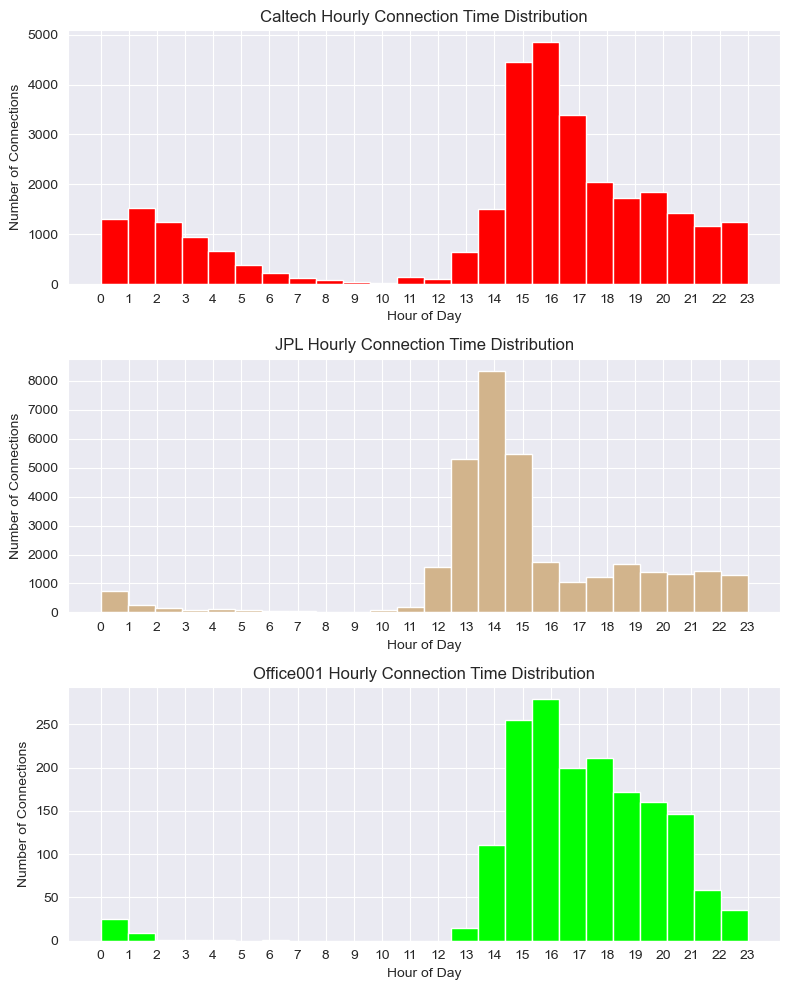

In [75]:
n_bins = 24
colors = ['red', 'tan', 'lime']
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(8,10), nrows=3, ncols=1)
ax0.hist(df_ct['connectionTimeHour'], n_bins, histtype='bar', color=colors[0])
ax1.hist(df_jpl['connectionTimeHour'], n_bins, histtype='bar', color=colors[1])
ax2.hist(df_of['connectionTimeHour'], n_bins, histtype='bar', color=colors[2])
ax0.set_title('Caltech Hourly Connection Time Distribution')
ax0.xaxis.set_ticks(np.arange(0, 24, 1))
ax0.set_xlabel("Hour of Day")
ax0.set_ylabel("Number of Connections")
ax1.set_title('JPL Hourly Connection Time Distribution')
ax1.xaxis.set_ticks(np.arange(0, 24, 1))
ax1.set_xlabel("Hour of Day")
ax1.set_ylabel("Number of Connections")
ax2.set_title('Office001 Hourly Connection Time Distribution')
ax2.xaxis.set_ticks(np.arange(0, 24, 1))
ax2.set_xlabel("Hour of Day")
ax2.set_ylabel("Number of Connections")
fig.tight_layout()
plt.show()

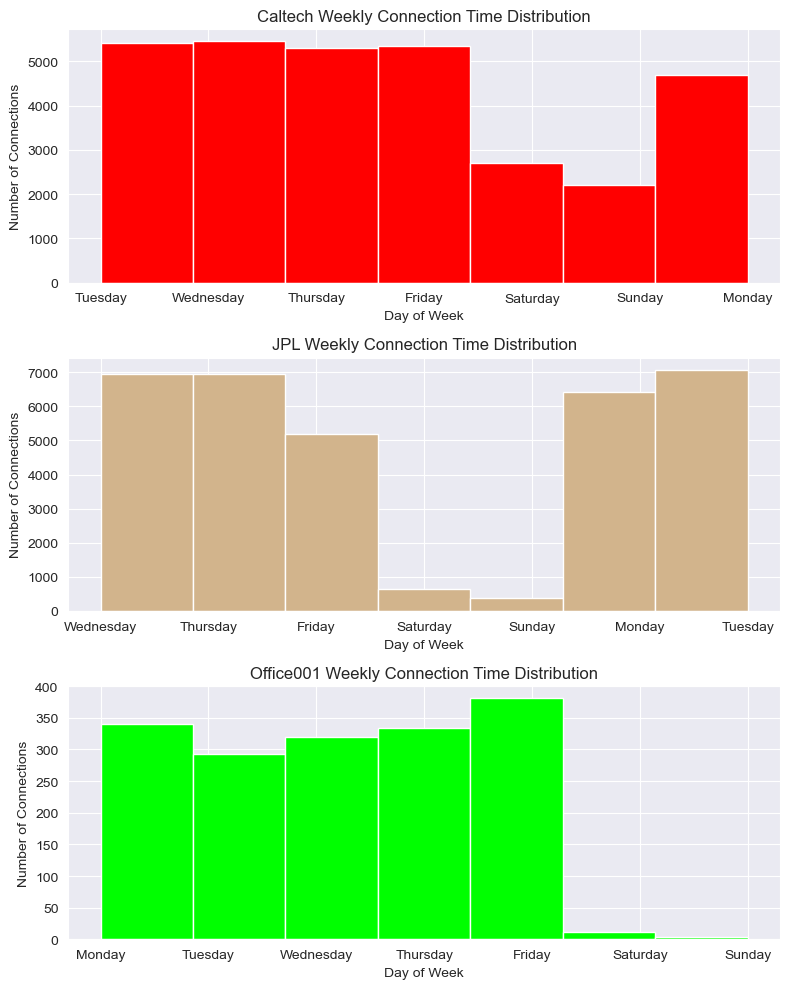

In [88]:
n_bins = 7
colors = ['red', 'tan', 'lime']
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(8,10), nrows=3, ncols=1)
ax0.hist(df_ct['connectionTime'].dt.day_name(), n_bins, histtype='bar', color=colors[0])
ax1.hist(df_jpl['connectionTime'].dt.day_name(), n_bins, histtype='bar', color=colors[1])
ax2.hist(df_of['connectionTime'].dt.day_name(), n_bins, histtype='bar', color=colors[2])
ax0.set_title('Caltech Weekly Connection Time Distribution')
ax0.xaxis.set_ticks(np.arange(0, n_bins, 1))
ax0.set_xlabel("Day of Week")
ax0.set_ylabel("Number of Connections")
ax1.set_title('JPL Weekly Connection Time Distribution')
ax1.xaxis.set_ticks(np.arange(0, n_bins, 1))
ax1.set_xlabel("Day of Week")
ax1.set_ylabel("Number of Connections")
ax2.set_title('Office001 Weekly Connection Time Distribution')
ax2.xaxis.set_ticks(np.arange(0, n_bins, 1))
ax2.set_xlabel("Day of Week")
ax2.set_ylabel("Number of Connections")
fig.tight_layout()
plt.show()

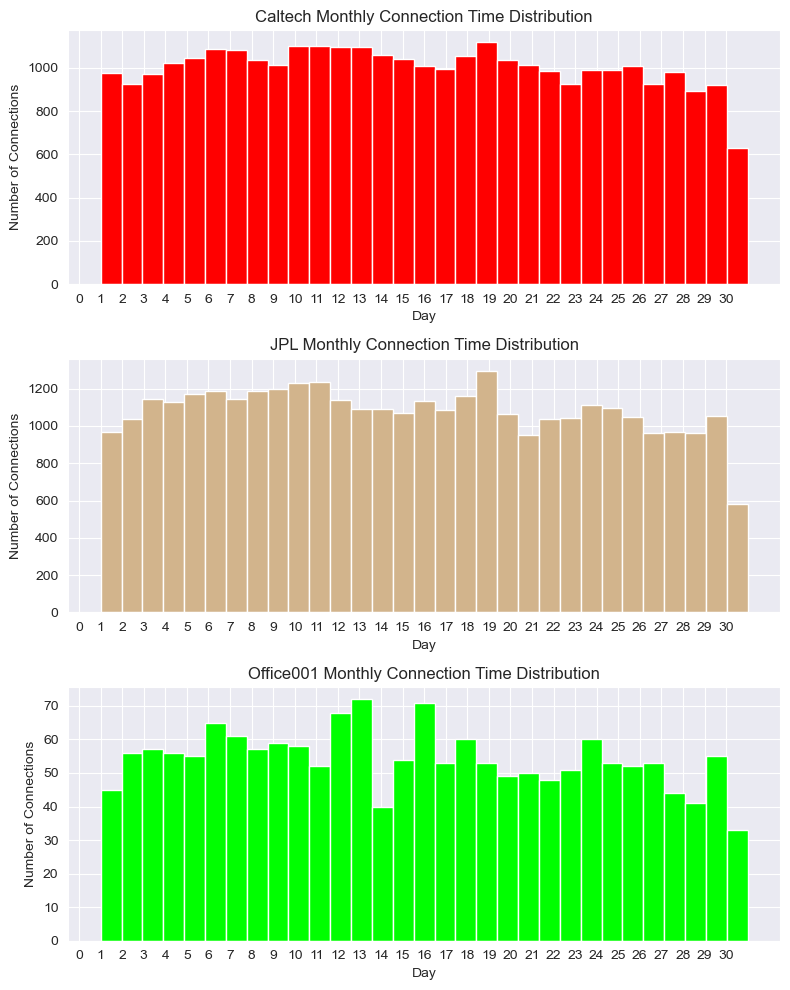

In [89]:
n_bins = 31
colors = ['red', 'tan', 'lime']
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(8,10), nrows=3, ncols=1)
ax0.hist(df_ct['connectionTimeDay'], n_bins, histtype='bar', color=colors[0])
ax1.hist(df_jpl['connectionTimeDay'], n_bins, histtype='bar', color=colors[1])
ax2.hist(df_of['connectionTimeDay'], n_bins, histtype='bar', color=colors[2])
ax0.set_title('Caltech Monthly Connection Time Distribution')
ax0.xaxis.set_ticks(np.arange(0, n_bins, 1))
ax0.set_xlabel("Day")
ax0.set_ylabel("Number of Connections")
ax1.set_title('JPL Monthly Connection Time Distribution')
ax1.xaxis.set_ticks(np.arange(0, n_bins, 1))
ax1.set_xlabel("Day")
ax1.set_ylabel("Number of Connections")
ax2.set_title('Office001 Monthly Connection Time Distribution')
ax2.xaxis.set_ticks(np.arange(0, n_bins, 1))
ax2.set_xlabel("Day")
ax2.set_ylabel("Number of Connections")
fig.tight_layout()
plt.show()

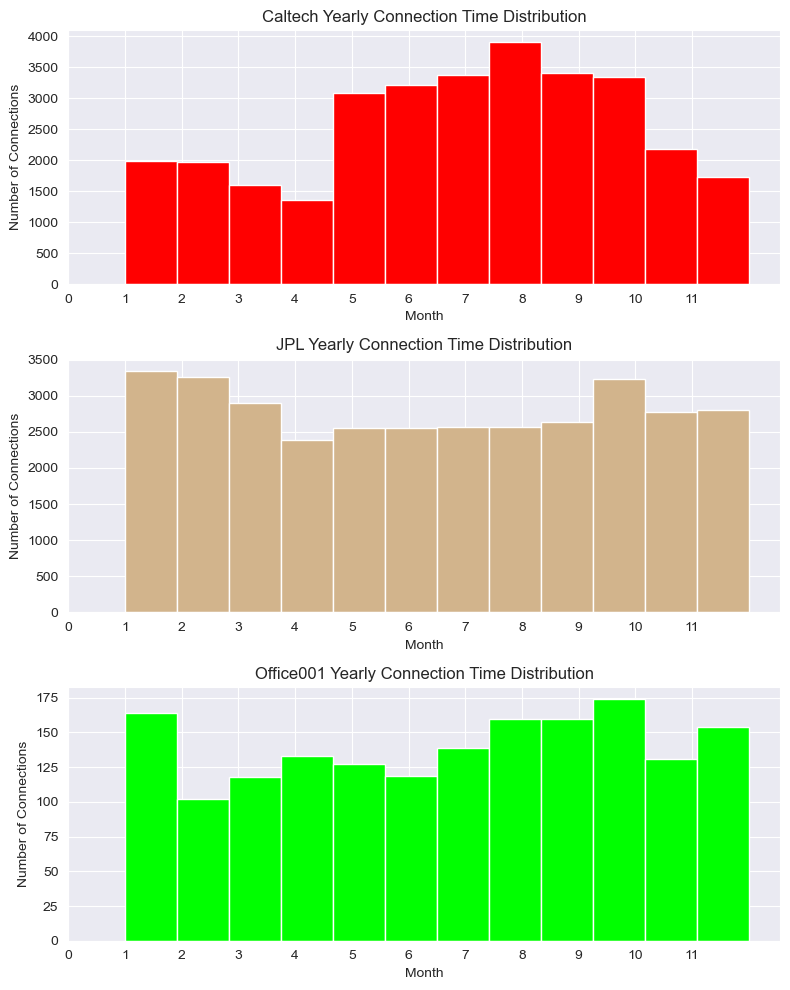

In [90]:
n_bins = 12
colors = ['red', 'tan', 'lime']
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(8,10), nrows=3, ncols=1)
ax0.hist(df_ct['connectionTime'].dt.month, n_bins, histtype='bar', color=colors[0])
ax1.hist(df_jpl['connectionTime'].dt.month, n_bins, histtype='bar', color=colors[1])
ax2.hist(df_of['connectionTime'].dt.month, n_bins, histtype='bar', color=colors[2])
ax0.set_title('Caltech Yearly Connection Time Distribution')
ax0.xaxis.set_ticks(np.arange(0, n_bins, 1))
ax0.set_xlabel("Month")
ax0.set_ylabel("Number of Connections")
ax1.set_title('JPL Yearly Connection Time Distribution')
ax1.xaxis.set_ticks(np.arange(0, n_bins, 1))
ax1.set_xlabel("Month")
ax1.set_ylabel("Number of Connections")
ax2.set_title('Office001 Yearly Connection Time Distribution')
ax2.xaxis.set_ticks(np.arange(0, n_bins, 1))
ax2.set_xlabel("Month")
ax2.set_ylabel("Number of Connections")
fig.tight_layout()
plt.show()

In [78]:
len(df_ct) + len(df_jpl) + len(df_of)

66393

In [79]:
min(df_ct['connectionTime'].min(), df_jpl['connectionTime'].min(), df_of['connectionTime'].min())

Timestamp('2018-05-01 13:23:18+0000', tz='UTC')

In [80]:
max(df_ct['connectionTime'].max(), df_jpl['connectionTime'].max(), df_of['connectionTime'].max())

Timestamp('2021-09-13 06:31:02+0000', tz='UTC')

In [93]:
df_ct['connectionTime'].describe(datetime_is_numeric=True)

count                                  31125
mean     2019-04-27 23:01:38.512224768+00:00
min                2018-05-01 13:23:18+00:00
25%                2018-08-28 17:14:21+00:00
50%                2019-01-18 02:33:39+00:00
75%                2019-10-02 15:49:58+00:00
max                2021-09-13 06:31:02+00:00
Name: connectionTime, dtype: object

In [94]:
df_jpl['connectionTime'].describe(datetime_is_numeric=True)

count                                  33587
mean     2019-11-11 04:05:25.206657536+00:00
min                2018-09-05 11:04:13+00:00
25%         2019-03-21 14:58:18.500000+00:00
50%                2019-09-10 13:47:13+00:00
75%         2020-03-03 15:53:40.500000+00:00
max                2021-09-12 16:34:37+00:00
Name: connectionTime, dtype: object

In [95]:
df_of['connectionTime'].describe(datetime_is_numeric=True)

count                                   1681
mean     2020-02-29 03:26:05.146936320+00:00
min                2019-03-25 16:24:42+00:00
25%                2019-09-06 22:07:54+00:00
50%                2019-12-09 22:31:33+00:00
75%                2020-07-24 20:49:45+00:00
max                2021-09-10 21:12:26+00:00
Name: connectionTime, dtype: object

# Number of Charges per User

In [98]:
df_ct.userID.value_counts()

000000743    484
000000562    385
000001082    382
000001470    315
000001746    314
            ... 
000000394      1
000000393      1
000000459      1
000004994      1
000000001      1
Name: userID, Length: 570, dtype: int64

In [99]:
df_jpl.userID.value_counts()

000000169    527
000000405    491
000000651    490
000000933    484
000003687    381
            ... 
000006801      1
000001355      1
000005851      1
000015260      1
000001663      1
Name: userID, Length: 520, dtype: int64

In [102]:
df_of.userID.value_counts()

000006620    243
000006140     91
000011242     62
000006062     46
000010924     30
000006189     18
000010808     17
000006038     14
000006171     14
000003618     12
000004400     10
000006297      6
000010209      6
000018103      6
000011920      1
000000722      1
000016885      1
000008884      1
000010598      1
000007443      1
000006429      1
000018550      1
Name: userID, dtype: int64

In [104]:
print((set(df_ct.userID)) & (set(df_jpl.userID)) & (set(df_of.userID)))

{None}


# Distribution of Charges by Location

In [108]:
df_ct.groupby(df_ct.stationID).spaceID.value_counts()

stationID     spaceID 
2-39-123-23   CA-313       908
2-39-123-557  CA-503       247
2-39-124-22   CA-312       665
2-39-124-558  CA-504       149
2-39-125-21   CA-311      1042
2-39-125-559  CA-505        74
2-39-126-20   CA-310       561
2-39-126-560  CA-506       124
2-39-127-19   CA-309      1022
2-39-127-561  CA-507        90
2-39-128-18   CA-308       612
2-39-128-562  CA-508       120
2-39-129-17   CA-307      1136
2-39-129-563  CA-509        88
2-39-130-31   CA-306       789
2-39-130-564  CA-510       136
2-39-131-30   CA-305      1399
2-39-131-565  CA-511       104
2-39-138-29   CA-304       994
2-39-138-566  CA-512       175
2-39-139-28   CA-303      1792
2-39-139-567  CA-513       108
2-39-78-360   CA-322       578
2-39-78-361   CA-493       529
2-39-78-362   CA-496       452
2-39-78-363   CA-320       615
2-39-78-364   CA-495       458
2-39-78-365   CA-321       862
2-39-78-366   CA-323       759
2-39-78-367   CA-494       533
2-39-79-376   CA-324       581
2-39-79-377   CA

<AxesSubplot: xlabel='stationID,spaceID'>

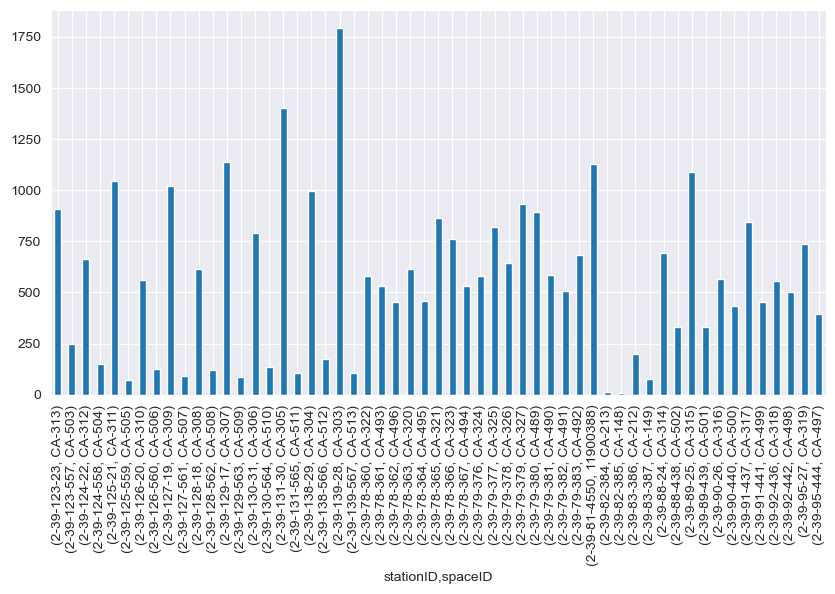

In [110]:
df_ct.groupby(df_ct.stationID).spaceID.value_counts().plot(kind='bar', figsize=(10,5))

In [111]:
df_jpl.groupby(df_jpl.stationID).spaceID.value_counts()

stationID    spaceID
1-1-178-817  AG-1F09     950
1-1-178-823  AG-1F08    1448
1-1-178-824  AG-1F07     929
1-1-178-828  AG-1F10    1266
1-1-179-777  AG-3F28     631
1-1-179-779  AG-3F17     455
1-1-179-781  AG-3F31     584
1-1-179-783  AG-3F29     538
1-1-179-787  AG-3F16     611
1-1-179-788  AG-3F22     499
1-1-179-790  AG-3F19     498
1-1-179-791  AG-3F26     563
1-1-179-794  AG-3F20     519
1-1-179-796  AG-3F24     516
1-1-179-797  AG-3F23     466
1-1-179-798  AG-3F18     522
1-1-179-799  AG-3F25     675
1-1-179-800  AG-3F32     636
1-1-179-801  AG-3F21     492
1-1-179-809  AG-3F27     556
1-1-179-810  AG-3F30     611
1-1-179-813  AG-3F15     461
1-1-179-815  AG-3F33     632
1-1-191-778  AG-4F43     440
1-1-191-780  AG-4F45     413
1-1-191-782  AG-4F50     481
1-1-191-784  AG-4F40     389
1-1-191-785  AG-4F48     388
1-1-191-786  AG-4F36     438
1-1-191-789  AG-4F52     442
1-1-191-792  AG-4F37     441
1-1-191-793  AG-4F38     435
1-1-191-795  AG-4F51     474
1-1-191-802  AG-4F44  

<AxesSubplot: xlabel='stationID,spaceID'>

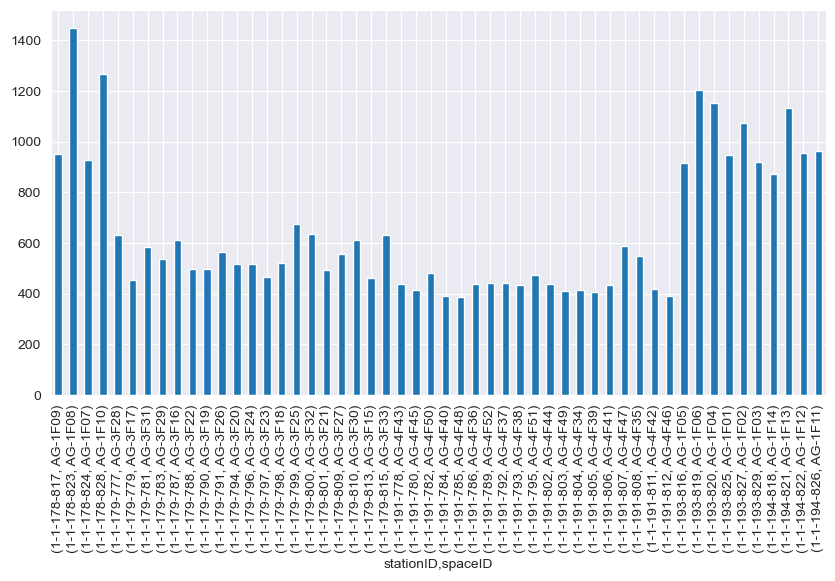

In [112]:
df_jpl.groupby(df_jpl.stationID).spaceID.value_counts().plot(kind='bar', figsize=(10,5))

In [113]:
df_of.groupby(df_of.stationID).spaceID.value_counts()

stationID        spaceID
19-102-260-1633  02         323
19-102-260-1634  03         228
19-102-260-1635  01         161
19-102-260-1636  06         186
19-102-260-1637  07          76
19-102-260-1638  04         131
19-102-260-1639  05         268
19-102-260-1640  08         308
Name: spaceID, dtype: int64

<AxesSubplot: xlabel='stationID,spaceID'>

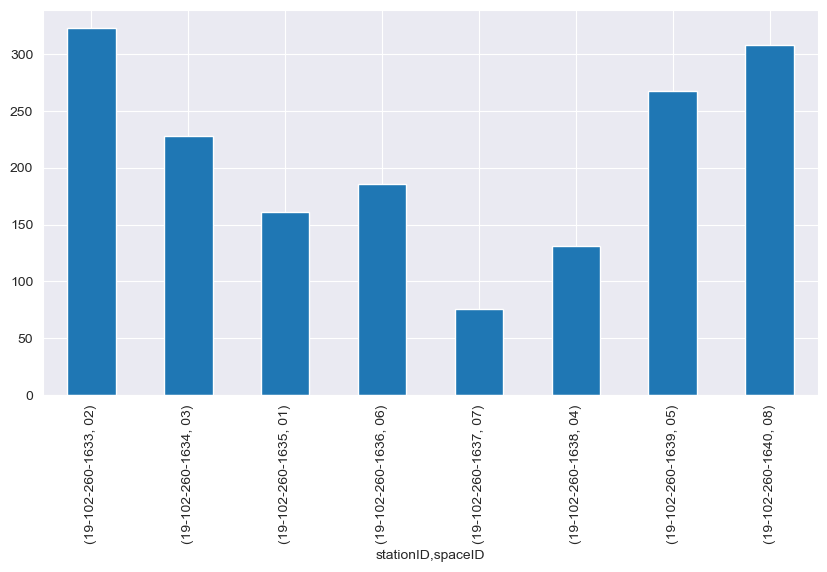

In [114]:
df_of.groupby(df_of.stationID).spaceID.value_counts().plot(kind='bar', figsize=(10,5))

# Convert User Inputs
process taken from here:

https://stackoverflow.com/a/41970572

In [ ]:
df['userInputs'].head()

In [ ]:
df['userInputs'].head()
df.loc[1:3,'userInputs'].apply(eval).apply(lambda x: x[0]).loc[1:3].apply(pd.Series)

In [ ]:
def convert_userInputs(x):
    """could do try except block instead"""
    # x is a string of a list of dictionaries, like this
    # '[{'userID': 333, 'milesRequested': 20, 'WhPerMile': 400, 'minutesAvailable': 277, 'modifiedAt': 'Wed, 05 Sep 2018 11:08:31 GMT', 'paymentRequired': True, 'requestedDeparture': 'Wed, 05 Sep 2018 15...}]'
    if x:
        x = eval(x) # convert string to list
        x = x[0] # get first and only entry in list (a dictionary)
        return pd.Series(x) # convert dictionary to a series
    else: # x is none
        none_record = {'userID':None, 
                       'milesRequested':None,
                       'WhPerMile':None,
                       'minutesAvailable':None,
                       'modifiedAt':None,
                       'paymentRequired':None,
                       'requestedDeparture':None,
                       'kWhRequested':None
                       }
        return pd.Series(none_record)

In [ ]:
df.loc[0:30,'userInputs'].apply(convert_userInputs)

In [ ]:
pd.concat([df.drop(columns='userInputs'), df['userInputs'].apply(convert_userInputs)], axis=1).columns

# 1. Define key metrics
Total charges | 66393
What is the date range of charges | 5-1-2018 to 9-13-2021
How many unique cars are there? | Cannot determine this with given data
What are the locations of charging | Caltech (siteID 2), JPL (siteID 1), Office001 (siteID 19)
What is the distribution of charges over time | See above
What is the distribution of charges over the hours of a day | See above
What is the distribution of charges by vehicle | Cannot determine this with given data but could do this with userID
What is the distribution of charges over location | See above
Is the rate of charging the same for a vehicle
Does the energy of daily charging change over time
Do the number of charges change over time